In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
import cupy as cp
import tensorflow as tf
tf_config=tf.ConfigProto()
tf_config.gpu_options.allow_growth=True
sess = tf.Session(config=tf_config)

In [3]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [4]:
import random, cv2
def random_cut(im_numpy,coutout_shape):
    shape=im_numpy.shape[0]
    x = random.randint(0,shape-coutout_shape)
    y = random.randint(0,shape-coutout_shape)
    im_numpy = im_numpy[x:x+coutout_shape,y:y+coutout_shape]
    return(im_numpy)
    
    

In [5]:
from random_eraser import get_random_eraser

def img_preprocess_cp(im_numpy):
    eraser = get_random_eraser()
    im_numpy = cp.pad(im_numpy,[(4, 4), (4, 4),(0, 0)],mode='edge')
#     print(type(im_numpy))
    rand_no = random.randint(0,9)
    if rand_no>4:
        flip_img = cp.flip(im_numpy, 1)
        cp.cuda.Stream.null.synchronize()
#         return(eraser(random_cut(flip_img,32)))
        return(random_cut(flip_img,32))
    else:
#         return(eraser(random_cut(im_numpy,32)))
        return(random_cut(im_numpy,32))

In [6]:
from random_eraser import get_random_eraser

def img_preprocess(im_numpy):
    eraser = get_random_eraser()
    im_numpy = np.pad(im_numpy,[(4, 4), (4, 4),(0, 0)],mode='edge')
#     print(type(im_numpy))
    rand_no = random.randint(0,9)
    if rand_no>4:
        flip_img = np.flip(im_numpy, 1)
#         return(eraser(random_cut(flip_img,32)))
        return(random_cut(flip_img,32))
    else:
#         return(eraser(random_cut(im_numpy,32)))
        return(random_cut(im_numpy,32))

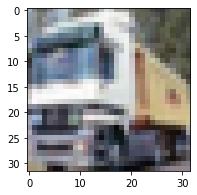

In [7]:
fig = plt.figure(figsize=(8,3))
plt.imshow(train_features[1])

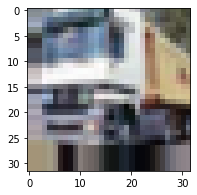

In [8]:
fig = plt.figure(figsize=(8,3))
plt.imshow(img_preprocess(train_features[1].copy()))

In [9]:
cp.pa

AttributeError: module 'cupy' has no attribute 'pa'

In [11]:
s = time.time()
for i in train_features:
    x = img_preprocess(i.copy())
e = time.time()
print(e - s)

2.565953254699707


In [12]:
s = time.time()
for i in train_features:
    x = img_preprocess_cp(i.copy())
e = time.time()
print(e - s)

18.80227041244507


In [ ]:

x_gpu = cp.ones((10,10,10))
cp.cuda.Stream.null.synchronize()
e = time.time()
print(e - s)

In [ ]:
x_gpu = cp.ones((32,32))

In [ ]:
plt.imshow(np.flip(train_features[1],1))

In [ ]:
plt.imshow(cp.flip(train_features[1],1))

In [ ]:
plt.imshow(train_features[1])